In [1]:
import importlib

In [2]:
import os

resource_folder = 'resources/proceed/1403'

all_files = set()

for month in os.listdir(resource_folder):
    month_folder = os.path.join(resource_folder, month)

    if os.path.isdir(month_folder):
        for file_name in os.listdir(month_folder):
            all_files.add(file_name)

files = list(all_files)


In [3]:
import src.preprocessing.aggregator as aggregator

importlib.reload(aggregator)

import src.preprocessing.data_selector as data_selector

importlib.reload(data_selector)
ds = data_selector.DataSelector

all_df = []
proceed_df = []

for file_name in files:
    print(file_name)
    agg = aggregator.Aggregator
    agg = agg(file_name)

    df = agg.aggregate_specific_data()

    all_df.append(df)
    proceed_df.append(data_selector.aggregate_hourly_mean(df))

113860.xlsx
113252.xlsx
113424.xlsx
113207.xlsx
113260.xlsx
113418.xlsx
113801.xlsx
114352.xlsx
113451.xlsx
113293.xlsx
113229.xlsx
113213.xlsx
113201.xlsx
113805.xlsx
113954.xlsx
114351.xlsx
113463.xlsx
113257.xlsx
113453.xlsx
113209.xlsx
113210.xlsx
113701.xlsx
113501.xlsx
114102.xlsx
114153.xlsx
113904.xlsx
113474.xlsx
114468.xlsx
113203.xlsx
113256.xlsx
113341.xlsx
113551.xlsx
113401.xlsx
113963.xlsx
113352.xlsx
114413.xlsx
113464.xlsx
113466.xlsx
113408.xlsx
113653.xlsx
113302.xlsx
113909.xlsx
113815.xlsx
114304.xlsx
113651.xlsx
114256.xlsx
113863.xlsx
113251.xlsx
114418.xlsx
113855.xlsx
113478.xlsx
113264.xlsx
114401.xlsx
113403.xlsx
113419.xlsx
113913.xlsx
113428.xlsx
113469.xlsx
113417.xlsx
113601.xlsx
114357.xlsx
113208.xlsx
114309.xlsx
113202.xlsx
113813.xlsx
114101.xlsx
113243.xlsx
113214.xlsx
113465.xlsx
113414.xlsx
113415.xlsx
114301.xlsx
113249.xlsx
113458.xlsx
114110.xlsx
114354.xlsx
114160.xlsx
114151.xlsx
113259.xlsx
113206.xlsx
113467.xlsx
114103.xlsx
114463.xlsx
1143

In [4]:
import numpy as np
import src.analysis.comparator as comparator

importlib.reload(comparator)

n = len(proceed_df)

similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i == j:
            similarity_matrix[i, j] = 1
        elif i < j:
            dfc = comparator.DataFrameComparer
            dfc = dfc(proceed_df[i], proceed_df[j])
            result = dfc.evaluate_similarity()['Pearson Correlation']['total number of vehicles']
            similarity_matrix[i, j] = result
            similarity_matrix[j, i] = result

similarity_matrix

array([[1.        , 0.44066922, 0.59606884, ..., 0.39678734, 0.15266108,
        0.26369802],
       [0.44066922, 1.        , 0.8604852 , ..., 0.84228961, 0.9401034 ,
        0.96994204],
       [0.59606884, 0.8604852 , 1.        , ..., 0.93429983, 0.75062448,
        0.80249484],
       ...,
       [0.39678734, 0.84228961, 0.93429983, ..., 1.        , 0.77737982,
        0.84117498],
       [0.15266108, 0.9401034 , 0.75062448, ..., 0.77737982, 1.        ,
        0.97877603],
       [0.26369802, 0.96994204, 0.80249484, ..., 0.84117498, 0.97877603,
        1.        ]], shape=(125, 125))

In [5]:
distance_matrix = 1 - similarity_matrix

distance_matrix

array([[0.        , 0.55933078, 0.40393116, ..., 0.60321266, 0.84733892,
        0.73630198],
       [0.55933078, 0.        , 0.1395148 , ..., 0.15771039, 0.0598966 ,
        0.03005796],
       [0.40393116, 0.1395148 , 0.        , ..., 0.06570017, 0.24937552,
        0.19750516],
       ...,
       [0.60321266, 0.15771039, 0.06570017, ..., 0.        , 0.22262018,
        0.15882502],
       [0.84733892, 0.0598966 , 0.24937552, ..., 0.22262018, 0.        ,
        0.02122397],
       [0.73630198, 0.03005796, 0.19750516, ..., 0.15882502, 0.02122397,
        0.        ]], shape=(125, 125))

In [6]:
from scipy.spatial.distance import squareform

condensed_dist = squareform(distance_matrix, checks=False)

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(condensed_dist, method='average')

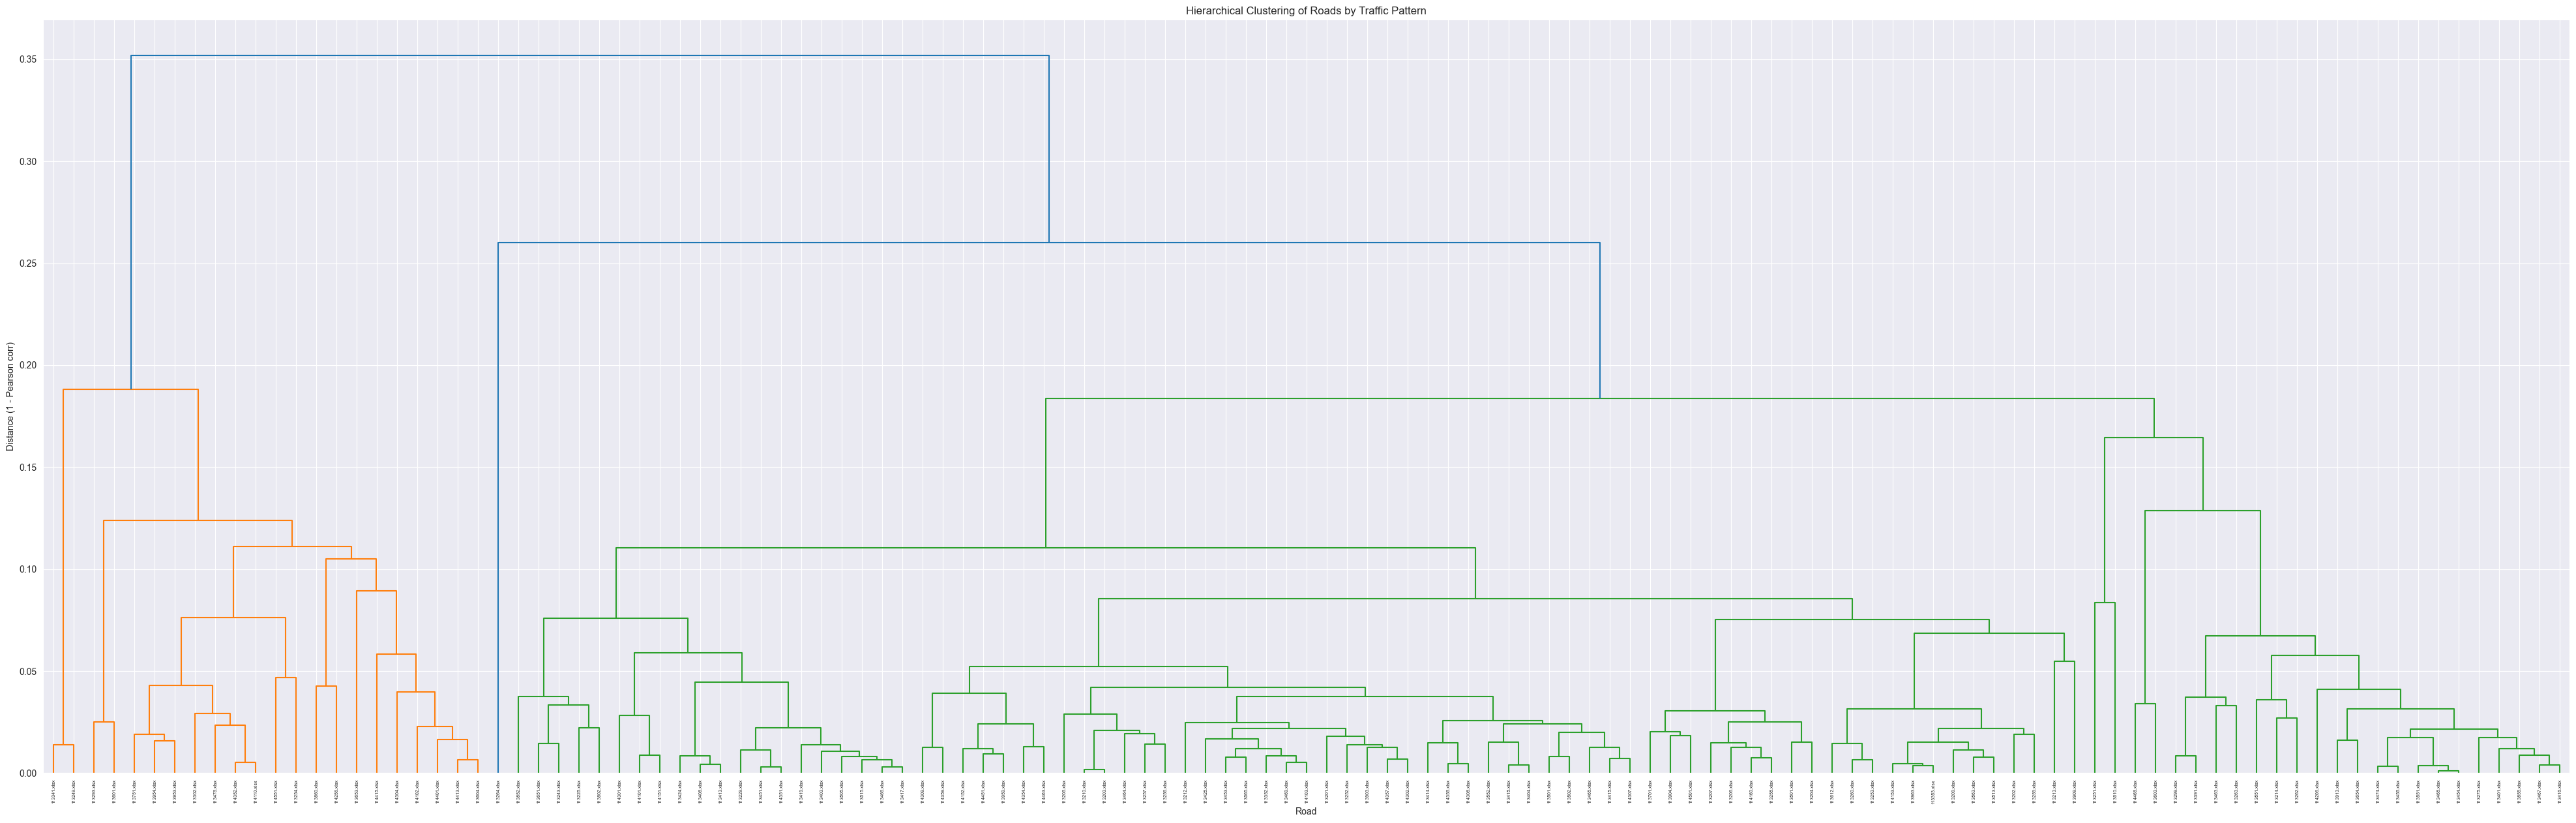

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 15))
dendrogram(Z, labels=files)
plt.title("Hierarchical Clustering of Roads by Traffic Pattern")
plt.xlabel("Road")
plt.ylabel("Distance (1 - Pearson corr)")
plt.show()

In [9]:
import pandas as pd
from sklearn.cluster import AffinityPropagation

aff = AffinityPropagation(affinity='precomputed', random_state=42)
aff.fit(similarity_matrix)
labels = aff.labels_

ap_df = pd.DataFrame({'road_id': files, 'cluster': labels})

ap_df


,road_id,cluster
0,113860.xlsx,5
1,113252.xlsx,1
2,113424.xlsx,8
3,113207.xlsx,10
4,113260.xlsx,9
...,...,...
120,113212.xlsx,1
121,113552.xlsx,12
122,113802.xlsx,12
123,113454.xlsx,2


In [10]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(Z, t=0.15, criterion='distance')

labels


array([2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 5, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 5, 5, 3, 3, 1, 5, 5, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2,
       3, 2, 3, 4, 2, 5, 2, 6, 2, 3, 3, 5, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 5, 3, 3, 3, 3, 1, 5, 2, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 5, 5, 3,
       5, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 5, 5, 3, 5, 5, 2, 4, 3, 5, 2, 2,
       3, 3, 3, 2, 3, 3, 5, 3, 3, 5, 3, 3, 3, 5, 5], dtype=int32)

In [11]:
k = 3
clusters = fcluster(Z, t=k, criterion='maxclust')

cluster_df = pd.DataFrame({'road_id': files, 'cluster': clusters})

cluster_df

,road_id,cluster
0,113860.xlsx,1
1,113252.xlsx,2
2,113424.xlsx,2
3,113207.xlsx,2
4,113260.xlsx,2
...,...,...
120,113212.xlsx,2
121,113552.xlsx,2
122,113802.xlsx,2
123,113454.xlsx,2


In [12]:
cluster_mapping = {
    # 🟢 **South**
    'آزادراه قم - گرمسار (چرمشهر)': 'South',
    'آزادراه گرمسار - قم (چرمشهر)': 'South',
    'آزادراه تهران - قم (مجتمع ياس)': 'South',
    'آزادراه قم - تهران (مجتمع ياس)': 'South',
    'آزادراه تهران - قم (عوارضي تهران)': 'South',
    'آزادراه قم - تهران (عوارضي تهران)': 'South',
    'آزادراه قم - تهران (بين فرودگاه و حسن آباد)': 'South',
    'آزادراه تهران - قم (بين فرودگاه و حسن آباد)': 'South',
    'عوارضي آزادراه قم - تهران (بهشت زهرا)(مجموع گيت ها)': 'South',
    'فرودگاه امام خميني - آزادراه قم، تهران': 'South',
    'آزادراه تهران، قم - فرودگاه امام خميني': 'South',
    'آزادراه تهران، قم - اسلامشهر': 'South',
    'اسلامشهر - آزادراه تهران، قم': 'South',
    'تهران - حسن آباد (جاده قديم قم)': 'South',
    'حسن آباد - تهران (جاده قديم قم)': 'South',
    'جاده قديم تهران - قم (حسن آباد) (متناظر توزين)': 'South',
    'جاده قديم تهران، قم (حسن‌آباد - نعلبندان)': 'South',
    'جاده قديم قم، تهران (نعلبندان - حسن‌آباد)': 'South',
    'رباط\u200cکريم - حسن\u200cآباد (وهن آباد - جاده قديم قم)': 'South',
    'حسن\u200cآباد - رباط\u200cکريم (جاده قديم قم - وهن آباد)': 'South',
    'رباط کريم - شهريار': 'South',
    'شهريار - رباط کريم': 'South',
    'آزادراه تهران - ساوه (عوارضي تهران)': 'South',
    'آزادراه ساوه - تهران (عوارضي تهران)': 'South',
    'آزادراه تهران - ساوه (پرند)': 'South',
    'آزادراه ساوه - تهران (پرند)': 'South',
    'آزادراه تهران - ساوه (تهران-رباط کريم)': 'South',
    'آزادراه ساوه - تهران (رباط کريم-تهران)': 'South',
    'عوارضي آزادراه ساوه - تهران (تهران)(مجموع گيت ها)': 'South',
    'عوارضي آزادراه تهران - ساوه (تهران)(مجموع گيت ها)': 'South',
    'جاده قديم تهران - ساوه (رباط‌کريم - پرند)': 'South',
    'جاده قديم ساوه - تهران (پرند - رباط‌کريم)': 'South',
    'آزادراه چرمشهر - آبيک (چرمشهر)': 'South',
    'آزادراه آبيک -چرمشهر (چرمشهر)': 'South',
    'جاده دسترسي احمدآباد مستوفي(آزادگان - اسلامشهر)': 'South',
    'جاده دسترسي احمدآباد مستوفي(اسلامشهر - آزادگان)': 'South',

    # 🔴 **West**
    'آزادراه تهران - کرج (عوارضي قديم)': 'West',
    'آزادراه کرج - تهران (عوارضي قديم)': 'West',
    'جاده مخصوص تهران - کرج (وردآورد)': 'West',
    'جاده مخصوص کرج - تهران (وردآورد)': 'West',
    'تهران - وردآورد (همت)': 'West',
    'وردآورد - تهران (همت)': 'West',
    'شهريار - آدران': 'West',
    'شهريار-کرج (هفت جوي)': 'West',
    'کرج-شهريار (هفت جوي)': 'West',
    'شهريار - تهران (باغستان)': 'West',
    'شهريار - تهران (شهر قدس)': 'West',
    'تهران - شهريار (باغستان)': 'West',
    'تهران - شهريار (شهر قدس)': 'West',
    'ملارد - صفادشت': 'West',
    'صفادشت - ملارد': 'West',
    'شهريار(بلوار وليعصر) - ملارد': 'West',
    'ملارد - شهريار(بلوار وليعصر)': 'West',
    'آزادراه چرمشهر - آبيک (تقاطع آزادراه تهران - ساوه)': 'West',
    'آزادراه چرمشهر - آبيک (تقاطع اخترآباد)': 'West',
    'آزادراه آبيک - چرمشهر (تقاطع آزادراه تهران - ساوه)': 'West',
    'آزادراه آبيک - چرمشهر(تقاطع اخترآباد)': 'West',

    # 🟣 **North**
    'تهران - امام زاده داوود': 'North',
    'امام زاده داوود - تهران': 'North',
    'تهران - لواسانات (طلائيه)': 'North',
    'تهران - لواسانات (سوهانک)': 'North',
    'تهران - لواسانات (تلو)': 'North',
    'لواسانات - تهران (طلائيه)': 'North',
    'لواسانات - تهران (سوهانک)': 'North',
    'لواسانات - تهران (تلو)': 'North',
    'لواسانات - فشم': 'North',
    'فشم - ميگون': 'North',
    'فشم - لواسانات': 'North',
    'ميگون - فشم': 'North',
    'آزادراه تهران- شمال (قطعه اول - محدوده عوارضي تهران)': 'North',
    'آزادراه شمال - تهران (قطعه اول - محدوده عواضي تهران)': 'North',
    'آزادراه تهران- شمال (قطعه اول - بعد از تونل 12)': 'North',
    'آزادراه شمال - تهران (قطعه اول - بعد از تونل 12)': 'North',

    # 🔵 **East**
    'آزادراه تهران - پرديس (عوارضي پرديس)': 'East',
    'آزادراه پرديس - تهران (عوارضي پرديس)': 'East',
    'آزادراه تهران - پرديس (بومهن)': 'East',
    'آزادراه پرديس - تهران (بومهن)': 'East',
    'عوارضي آزادراه تهران- پرديس (فاز8 ) (مجموع گيت ها)': 'East',
    'عوارضي آزادراه پرديس- تهران (فاز11) (مجموع گيت ها)': 'East',
    'رودهن - دماوند': 'East',
    'دماوند - رودهن': 'East',
    'رودهن - آبعلي': 'East',
    'آبعلي - رودهن': 'East',
    'پلور - آبعلي (سه‌راهي مشاء - آبعلي)': 'East',
    'آبعلي - پلور (آبعلي - سه‌راهي مشاء)': 'East',
    'پلور - آبعلي (امامزاده هاشم - سه‌راهي مشاء)': 'East',
    'آبعلي - پلور (سه‌راهي مشاء - امامزاده هاشم)': 'East',
    'دماوند - فيروزکوه (امين‌آباد - سه‌راه ارجمند)': 'East',
    'فيروزکوه - دماوند (سه‌راه ارجمند - امين‌آباد)': 'East',
    'دماوند - فيروزکوه (گيلاوند - آبسرد)': 'East',
    'فيروزکوه - دماوند (آبسرد - گيلاوند)': 'East',
    'دماوند - فيروزکوه (سربندان - امين‌آباد)': 'East',
    'فيروزکوه - دماوند (امين‌آباد - سربندان)': 'East',
    'فيروزکوه - دماوند (آبسرد - دماوند)': 'East',
    'دماوند - فيروزکوه (دماوند - آبسرد)': 'East',
    'دماوند - فيروزکوه (آبسرد - سربندان)': 'East',
    'فيروزکوه - دماوند (سربندان - آبسرد)': 'East',
    'دماوند - فيروزکوه (سه\u200cراهي ارجمند - فيروزکوه)': 'East',
    'فيروزکوه - دماوند (فيروزکوه - سه\u200cراهي ارجمند)': 'East',
    'فيروزکوه - گدوک': 'East',
    'گدوک - فيروزکوه': 'East',
    'آبسرد - ايوانکي (آبسرد - دوآب)': 'East',
    'ايوانکي - آبسرد (دوآب - آبسرد)': 'East',
    'کمربندي جنوبي رودهن (پرديس - دماوند)': 'East',
    'کمربندي جنوبي رودهن (دماوند - پرديس)': 'East',
    'فيروزکوه - سمنان (فيروزکوه)': 'East',
    'سمنان - فيروزکوه (فيروزکوه)': 'East',
    'جاجرود - تهران': 'East',
    'تهران - جاجرود (متناظر توزين)': 'East',
    'جاجرود - لتيان': 'East',
    'لتيان - جاجرود': 'East',

    # 🔵 **Southeast**
    'ري - قرچک': 'Southeast',
    'قرچک - ري': 'Southeast',
    'تهران - پاکدشت': 'Southeast',
    'پاکدشت - تهران': 'Southeast',
    'پاکدشت - شريف آباد': 'Southeast',
    'شريف آباد - پاکدشت': 'Southeast',
    'شريف آباد - گرمسار': 'Southeast',
    'گرمسار - شريف آباد': 'Southeast',
    'پيشوا - شريف‌آباد': 'Southeast',
    'شريف‌آباد - پيشوا': 'Southeast',
    'ورامين - چرمشهر': 'Southeast',
    'چرمشهر - ورامين': 'Southeast',
    'کمربندي دوم تهران (جاده ورامين - شورآباد)': 'Southeast',
    'کمربندي دوم تهران (شورآباد - جاده ورامين)': 'Southeast'
}


In [13]:
combined_df = pd.concat(all_df, ignore_index=True)
unique_axes = combined_df[['axis code', 'axis name']].drop_duplicates()

cluster_to_axes = {}

for axis_name, cluster in cluster_mapping.items():
    axis_code = unique_axes.loc[unique_axes['axis name'] == axis_name, 'axis code'].values[0]

    if cluster not in cluster_to_axes:
        cluster_to_axes[cluster] = []

    cluster_to_axes[cluster].append(axis_code)

In [14]:
cluster_1 = [df for df in all_df if df['axis code'].iloc[0] in cluster_to_axes['North']]

cluster_2 = [df for df in all_df if df['axis code'].iloc[0] in cluster_to_axes['East']]

cluster_3 = [df for df in all_df if df['axis code'].iloc[0] in cluster_to_axes['South']]

cluster_4 = [df for df in all_df if df['axis code'].iloc[0] in cluster_to_axes['West']]

cluster_5 = [df for df in all_df if df['axis code'].iloc[0] in cluster_to_axes['Southeast']]

In [15]:
import numpy as np
from scipy.signal import correlate, correlation_lags


def cross_correlation_lag(s1, s2, max_lag=4):
    lags = range(-max_lag, max_lag + 1)
    cross_corrs = [s1.corr(s2.shift(lag)) for lag in lags]

    max_corr = max(cross_corrs)  # Maximum correlation value
    best_lag = lags[np.argmax(cross_corrs)]

    # Optionally return all lags/correlations if needed
    return best_lag, max_corr, dict(zip(lags, cross_corrs))


In [16]:
from arabic_reshaper import reshape
from bidi.algorithm import get_display

results = []

axis = '113207'
target_df = None
for df in all_df:
    if str(df['axis code'].iloc[0]) == str(axis):
        target_df = df
        break

cluster_df = [data_selector.aggregate_hourly_mean(df) for df in cluster_1]

for i in range(len(cluster_df)):
    lag, max_corr, all_corrs = cross_correlation_lag(target_df['total number of vehicles'],
                                                     cluster_df[i]['total number of vehicles'],
                                                     4)
    results.append({
        "from": get_display(reshape('تهران - پردیس')),
        "to": get_display(reshape(cluster_1[i]['axis name'][0])),
        "lag": lag,
        "correlation": max_corr
    })

results_df = pd.DataFrame(results)

results_df

,from,to,lag,correlation
0,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,ﻢﺸﻓ - ﺕﺎﻧﺎﺳﺍﻮﻟ,-1,0.888205
1,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,(ﻪﻴﺋﻼﻃ) ﺕﺎﻧﺎﺳﺍﻮﻟ - ﻥﺍﺮﻬﺗ,1,0.762005
2,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,(ﻮﻠﺗ) ﺕﺎﻧﺎﺳﺍﻮﻟ - ﻥﺍﺮﻬﺗ,0,0.940628
3,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,(12 ﻞﻧﻮﺗ ﺯﺍ ﺪﻌﺑ - ﻝﻭﺍ ﻪﻌﻄﻗ) ﻝﺎﻤﺷ -ﻥﺍﺮﻬﺗ ﻩﺍﺭﺩﺍﺯﺁ,2,0.920355
4,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,(ﻮﻠﺗ) ﻥﺍﺮﻬﺗ - ﺕﺎﻧﺎﺳﺍﻮﻟ,-2,0.879994
5,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,(ﮏﻧﺎﻫﻮﺳ) ﻥﺍﺮﻬﺗ - ﺕﺎﻧﺎﺳﺍﻮﻟ,0,0.708738
6,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,(ﮏﻧﺎﻫﻮﺳ) ﺕﺎﻧﺎﺳﺍﻮﻟ - ﻥﺍﺮﻬﺗ,-3,0.874221
7,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,(ﻥﺍﺮﻬﺗ ﻲﺿﺭﺍﻮﻋ ﻩﺩﻭﺪﺤﻣ - ﻝﻭﺍ ﻪﻌﻄﻗ) ﻝﺎﻤﺷ -ﻥﺍﺮﻬﺗ ﻩﺍﺭﺩﺍﺯﺁ,2,0.873970
8,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,(ﻪﻴﺋﻼﻃ) ﻥﺍﺮﻬﺗ - ﺕﺎﻧﺎﺳﺍﻮﻟ,-3,0.875883
9,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,(ﻥﺍﺮﻬﺗ ﻲﺿﺍﻮﻋ ﻩﺩﻭﺪﺤﻣ - ﻝﻭﺍ ﻪﻌﻄﻗ) ﻥﺍﺮﻬﺗ - ﻝﺎﻤﺷ ﻩﺍﺭﺩﺍﺯﺁ,-4,0.860210


In [17]:
strong_links = results_df[
    (results_df["correlation"].abs() > 0.85) &
    (results_df["lag"] != 0) & (results_df["lag"].abs() < 3)
    ]

strong_links

,from,to,lag,correlation
0,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,ﻢﺸﻓ - ﺕﺎﻧﺎﺳﺍﻮﻟ,-1,0.888205
3,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,(12 ﻞﻧﻮﺗ ﺯﺍ ﺪﻌﺑ - ﻝﻭﺍ ﻪﻌﻄﻗ) ﻝﺎﻤﺷ -ﻥﺍﺮﻬﺗ ﻩﺍﺭﺩﺍﺯﺁ,2,0.920355
4,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,(ﻮﻠﺗ) ﻥﺍﺮﻬﺗ - ﺕﺎﻧﺎﺳﺍﻮﻟ,-2,0.879994
7,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,(ﻥﺍﺮﻬﺗ ﻲﺿﺭﺍﻮﻋ ﻩﺩﻭﺪﺤﻣ - ﻝﻭﺍ ﻪﻌﻄﻗ) ﻝﺎﻤﺷ -ﻥﺍﺮﻬﺗ ﻩﺍﺭﺩﺍﺯﺁ,2,0.873970
11,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,ﻢﺸﻓ - ﻥﻮﮕﻴﻣ,-1,0.930032
12,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,ﺕﺎﻧﺎﺳﺍﻮﻟ - ﻢﺸﻓ,-2,0.892402
13,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,ﺩﻭﻭﺍﺩ ﻩﺩﺍﺯ ﻡﺎﻣﺍ - ﻥﺍﺮﻬﺗ,-2,0.893506
14,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,ﻥﺍﺮﻬﺗ - ﺩﻭﻭﺍﺩ ﻩﺩﺍﺯ ﻡﺎﻣﺍ,-1,0.873567
15,ﺲﯾﺩﺮﭘ - ﻥﺍﺮﻬﺗ,ﻥﻮﮕﻴﻣ - ﻢﺸﻓ,-1,0.933599


In [31]:
import networkx as nx
from arabic_reshaper import reshape
from bidi.algorithm import get_display

def visualize_lag_flowchart(df, center_node, max_lag=2):
    center_node = get_display(reshape(center_node))
    lag_groups = {lag: [] for lag in range(-max_lag, max_lag + 1)}
    lag_groups[0].append(center_node)

    for _, row in df.iterrows():
        lag, f, t = int(row['lag']), row['from'], row['to']
        lag_groups[lag].append(t)

    pos = {}
    x_spacing = 4
    y_spacing = 2

    for lag, nodes in lag_groups.items():
        x = lag * x_spacing
        y_start = (len(nodes) - 1) * y_spacing / 2
        for i, node in enumerate(sorted(set(nodes))):
            y = y_start - i * y_spacing
            pos[node] = (x, y)

    G = nx.DiGraph()
    for _, row in df.iterrows():
        lag = int(row['lag'])
        if lag < 0:
            G.add_edge(row['to'], center_node, lag=lag, weight=row['correlation'])
        else:
            G.add_edge(center_node, row['to'], lag=lag, weight=row['correlation'])

    plt.figure(figsize=(16, 8))
    node_colors = ['orange' if n == center_node else '#1f77b4' for n in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=node_colors)

    label_pos = {node: (x, y - 0.3) for node, (x, y) in pos.items()}
    nx.draw_networkx_labels(G, label_pos, font_size=9)

    ax = plt.gca()
    for u, v, data in G.edges(data=True):
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        mid_x = (x0 + x1) / 2

        ax.plot([x0, mid_x], [y0, y0], color='gray')
        ax.plot([mid_x, mid_x], [y0, y1], color='gray')
        ax.plot([mid_x, x1], [y1, y1], color='gray')

        label = f"lag={data['lag']}, r={data['weight']:.2f}"
        if data['lag'] > 0:
            ax.text(x1 - 0.5, y1, label, fontsize=8, ha='right', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='gray'))
        else:
            ax.text(x0 + 0.5, y0, label, fontsize=8, ha='left', va='bottom',
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='gray'))

    plt.title(get_display(reshape(f"{get_display(reshape(center_node))} - ساختار افقی و عمودی با lag")), fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    x_values = [x for x, y in pos.values()]
    y_values = [y for x, y in pos.values()]

    x_margin = 1.5
    y_margin = 0.5

    plt.xlim(min(x_values) - x_margin, max(x_values) + x_margin)
    plt.ylim(min(y_values) - y_margin, max(y_values) + y_margin)
    plt.show()


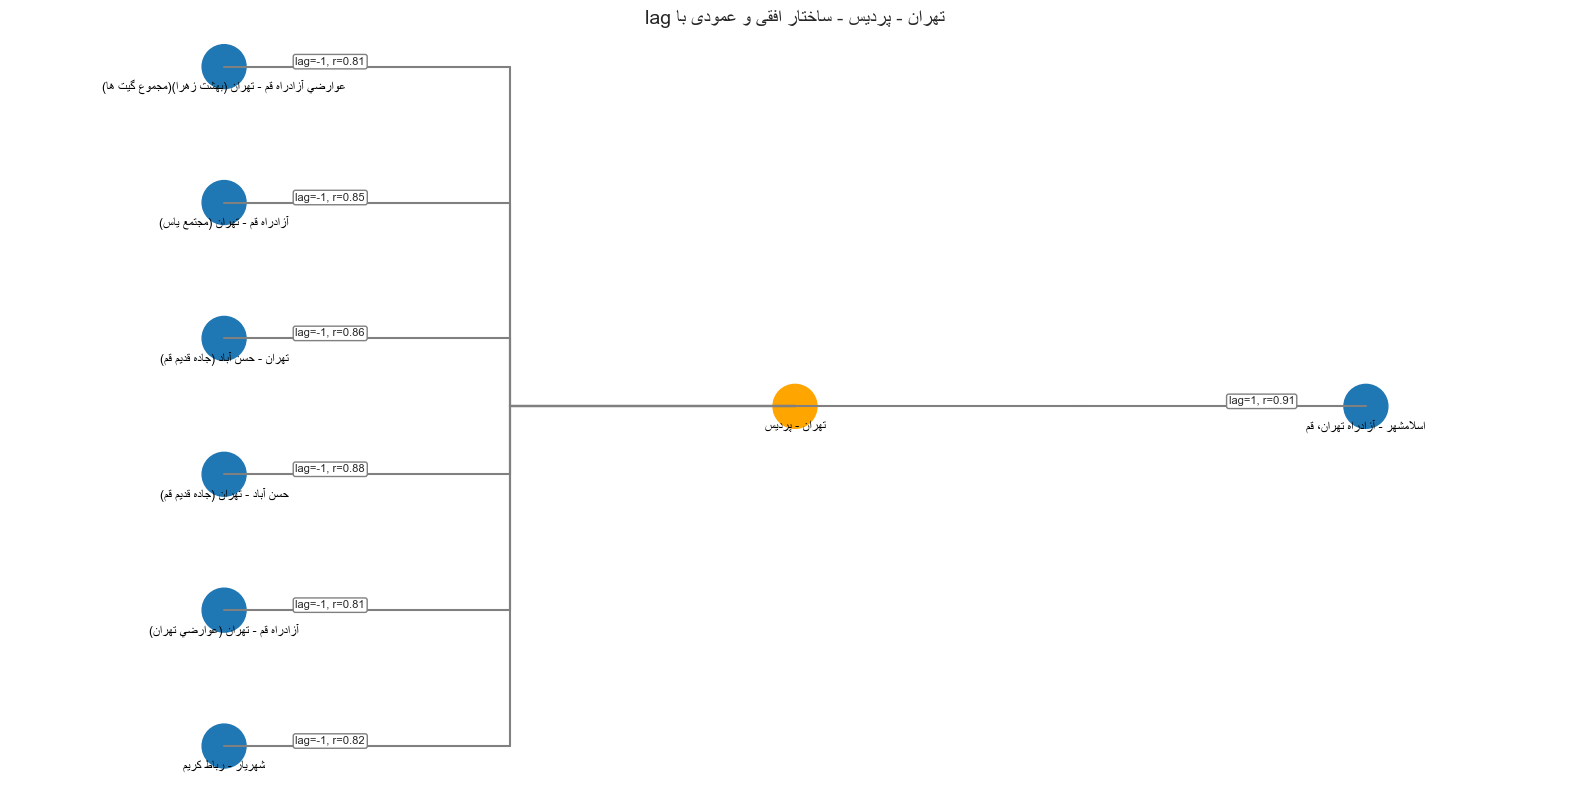

In [32]:
visualize_lag_flowchart(strong_links, center_node="تهران - پردیس", max_lag=2)


In [20]:
from arabic_reshaper import reshape
from bidi.algorithm import get_display
import pandas as pd

results = []

axis = [113653]
target_dfs = [df for df in all_df if df['axis code'].iloc[1] in axis]
dfs = [data_selector.aggregate_hourly_mean(df) for df in target_dfs]

cluster_dfs = [data_selector.aggregate_hourly_mean(df) for df in cluster_3]

for i, tdf in enumerate(dfs):
    tname = get_display(reshape(target_dfs[i]['axis name'].iloc[0]))
    series_t = tdf['total number of vehicles']

    for j, cdf in enumerate(cluster_dfs):
        cname = get_display(reshape(cluster_3[j]['axis name'].iloc[0]))
        series_c = cdf['total number of vehicles']

        lag, max_corr, _ = cross_correlation_lag(series_t, series_c, max_lag=4)

        results.append({
            "from": tname,
            "to": cname,
            "lag": lag,
            "correlation": max_corr
        })

results_cluster1 = pd.DataFrame(results)

results_cluster1

,from,to,lag,correlation
0,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,(ﻥﺍﺮﻬﺗ ﻲﺿﺭﺍﻮﻋ) ﻥﺍﺮﻬﺗ - ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ,-1,0.814055
1,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,(ﺩﺎﺑﺁﻦﺴﺣ - ﻥﺍﺪﻨﺒﻠﻌﻧ) ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻢﻳﺪﻗ ﻩﺩﺎﺟ,0,0.849778
2,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,(ﻦﻳﺯﻮﺗ ﺮﻇﺎﻨﺘﻣ) (ﺩﺎﺑﺁ ﻦﺴﺣ) ﻢﻗ - ﻥﺍﺮﻬﺗ ﻢﻳﺪﻗ ﻩﺩﺎﺟ,-1,0.781551
3,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,(ﺮﻬﺸﻣﺮﭼ) ﺭﺎﺴﻣﺮﮔ - ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ,-2,0.746297
4,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,(ﻥﺍﺮﻬﺗ ﻲﺿﺭﺍﻮﻋ) ﻢﻗ - ﻥﺍﺮﻬﺗ ﻩﺍﺭﺩﺍﺯﺁ,-1,0.732217
5,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,(ﺮﻬﺸﻣﻼﺳﺍ - ﻥﺎﮔﺩﺍﺯﺁ)ﻲﻓﻮﺘﺴﻣ ﺩﺎﺑﺁﺪﻤﺣﺍ ﻲﺳﺮﺘﺳﺩ ﻩﺩﺎﺟ,-1,0.788403
6,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,(ﺪﻧﺮﭘ - ﻢﻳﺮﮐﻁﺎﺑﺭ) ﻩﻭﺎﺳ - ﻥﺍﺮﻬﺗ ﻢﻳﺪﻗ ﻩﺩﺎﺟ,0,0.880475
7,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,ﻢﻳﺮﮐ ﻁﺎﺑﺭ - ﺭﺎﻳﺮﻬﺷ,-1,0.815287
8,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,(ﺱﺎﻳ ﻊﻤﺘﺠﻣ) ﻢﻗ - ﻥﺍﺮﻬﺗ ﻩﺍﺭﺩﺍﺯﺁ,-1,0.750434
9,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,ﺮﻬﺸﻣﻼﺳﺍ - ﻢﻗ ،ﻥﺍﺮﻬﺗ ﻩﺍﺭﺩﺍﺯﺁ,-2,0.652544


In [21]:
strong_links = results_cluster1[
    (results_cluster1["correlation"].abs() > 0.8) &
    (results_cluster1["lag"] != 0) &
    (results_cluster1["lag"].abs() < 3)
    ]

strong_links

,from,to,lag,correlation
0,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,(ﻥﺍﺮﻬﺗ ﻲﺿﺭﺍﻮﻋ) ﻥﺍﺮﻬﺗ - ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ,-1,0.814055
7,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,ﻢﻳﺮﮐ ﻁﺎﺑﺭ - ﺭﺎﻳﺮﻬﺷ,-1,0.815287
11,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,ﻢﻗ ،ﻥﺍﺮﻬﺗ ﻩﺍﺭﺩﺍﺯﺁ - ﺮﻬﺸﻣﻼﺳﺍ,1,0.909150
17,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,(ﻢﻗ ﻢﻳﺪﻗ ﻩﺩﺎﺟ) ﺩﺎﺑﺁ ﻦﺴﺣ - ﻥﺍﺮﻬﺗ,-1,0.860596
21,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,(ﻢﻗ ﻢﻳﺪﻗ ﻩﺩﺎﺟ) ﻥﺍﺮﻬﺗ - ﺩﺎﺑﺁ ﻦﺴﺣ,-1,0.882920
24,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,(ﺱﺎﻳ ﻊﻤﺘﺠﻣ) ﻥﺍﺮﻬﺗ - ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ,-1,0.846141
25,ﻥﺍﺮﻬﺗ ،ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ - ﻲﻨﻴﻤﺧ ﻡﺎﻣﺍ ﻩﺎﮔﺩﻭﺮﻓ,(ﺎﻫ ﺖﻴﮔ ﻉﻮﻤﺠﻣ)(ﺍﺮﻫﺯ ﺖﺸﻬﺑ) ﻥﺍﺮﻬﺗ - ﻢﻗ ﻩﺍﺭﺩﺍﺯﺁ ﻲﺿﺭﺍﻮﻋ,-1,0.807102


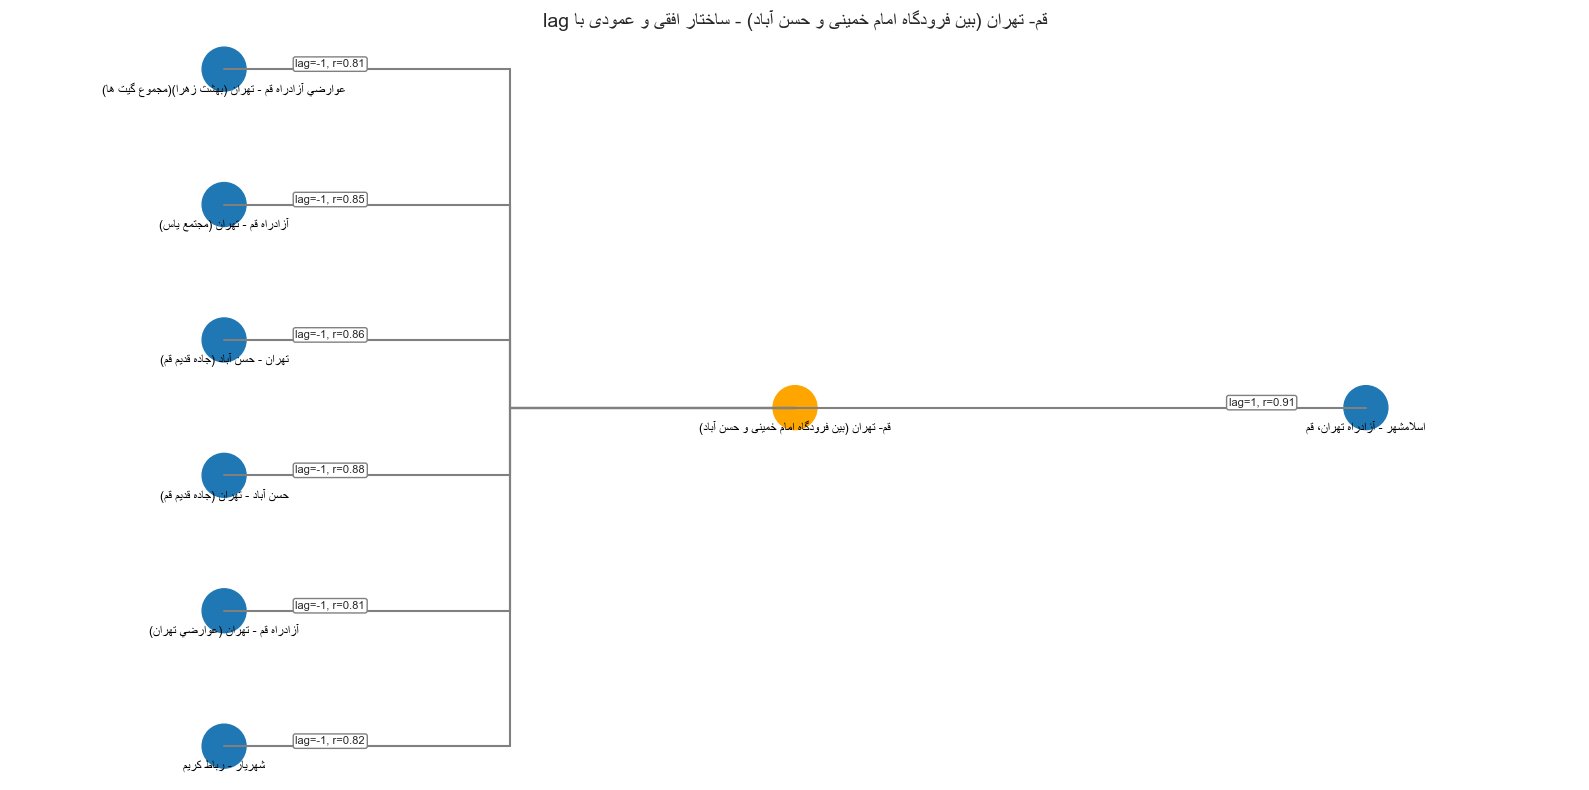

In [33]:
visualize_lag_flowchart(strong_links, center_node="قم- تهران (بین فرودگاه امام خمینی و حسن آباد)")